In [1]:
import os
proj_path = os.path.dirname(os.getcwd())
print(proj_path)
os.chdir(proj_path)

/home/congyu/congyu_program/pythons/inits/p_study_board


In [2]:
from utils.gsheet import gs_read_excel

In [3]:
df = gs_read_excel("record_study_time", least_col_name="start_time")

In [4]:
from datetime import datetime

In [5]:
def duration_in_mins(t_start, t_end):
    t_start = datetime.strptime(str(t_start), "%H:%M")
    t_end = datetime.strptime(str(t_end), "%H:%M")
    return (t_end - t_start).seconds / (60)

In [6]:
df["minutes"] = [duration_in_mins(t_start, t_end) for t_start, t_end in zip(df["start_time"], df["end_time"])]

In [7]:
df_r = df.groupby("name")["minutes"].apply(sum)

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='minutes', ylabel='name'>

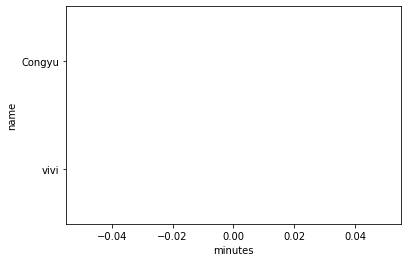

In [9]:
df_r = df_r.reset_index()

sns.barplot(data=df_r, y=df_r["name"], x=df_r["minutes"])


In [12]:
from datetime import datetime

In [15]:
str(datetime.now().strftime('%H_%M_%S'))

'14_31_54'

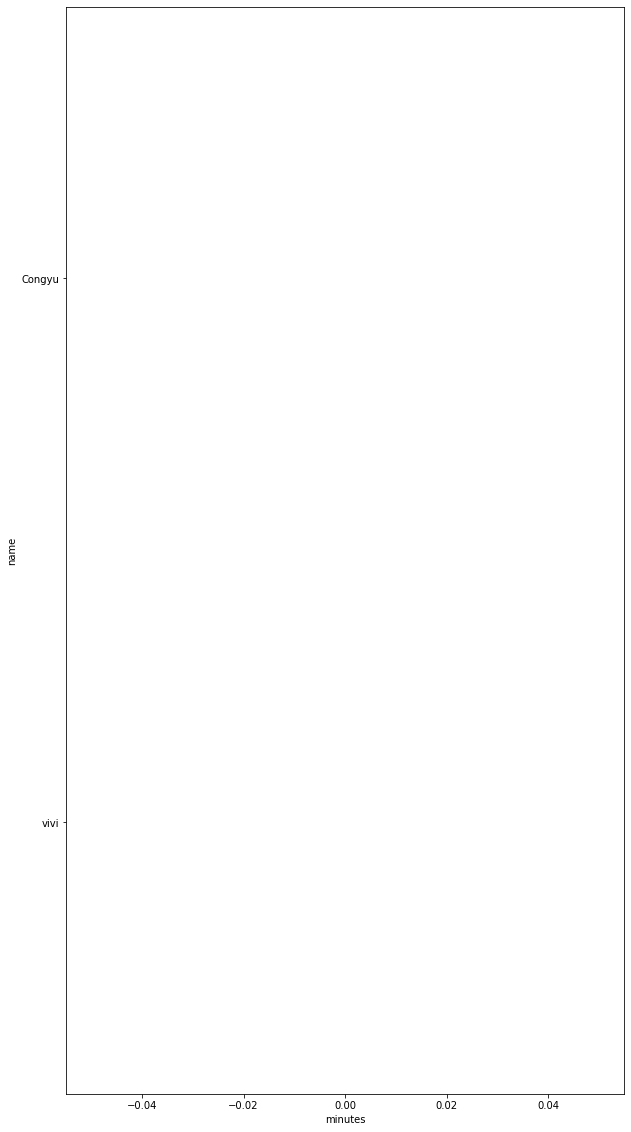

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 20))

sns.barplot(data=df_r, y=df_r["name"], x=df_r["minutes"])


fig.savefig('my_plot.png')